In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential,load_model
from keras.layers import LSTM,Dense,Dropout

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\csai9\Documents\Bharat Intern\Task 1 - Stock Prediction\netflix.csv", encoding='unicode_escape' )

In [3]:
class color:
    GREEN,RED='\033[92m' , '\033[91m'
    BOLD,UNDERLINE,END='\033[1m' , '\033[4m' , '\033[0m'
    GREEN_BOLD=GREEN+BOLD
    RED_BOLD=RED+BOLD
    GREEN_BOLD_UND=GREEN+BOLD+UNDERLINE

rb,gb=color.RED_BOLD,color.GREEN_BOLD
gbu,end=color.GREEN_BOLD_UND,color.END

In [4]:
df.shape

(1009, 7)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
df["Date"]=pd.to_datetime(df["Date"])
print(df.dtypes)

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [8]:
df["Year"]=df["Date"].apply(lambda x:str(x)[:4])
df["Month"]=df["Date"].apply(lambda x:str(x)[5:7])
df["Day"]=df["Date"].apply(lambda x:str(x)[8:10])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018,02,05
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018,02,06
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018,02,07
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018,02,08
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018,02,09


In [9]:
print(f'{rb}Total number of trading days: {end}{gbu}{df.shape[0]}{end}')
print(f'{rb}Total number of fields: {end}{gbu}{df.shape[1]}{end}')
print('\n')
print(f'{rb}Null values: {end}{gbu}{df.isnull().values.sum()}{end}')
print(f'{rb}NA values: {end}{gbu}{df.isna().values.any()}{end}')

Total number of trading days: 1009
Total number of fields: 10


Null values: 0
NA values: False


In [10]:
df=df["Open"].values
df=df.reshape(-1,1)

In [11]:
dataset_train=np.array(df[:int(df.shape[0]*0.8)])
dataset_test=np.array(df[:int(df.shape[0]*0.8):])

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
dataset_train=scaler.fit_transform(dataset_train)
dataset_test=scaler.transform(dataset_test)

In [13]:
def create_dataset(df):
    x=[]
    y=[]
    for i in range(50,df.shape[0]):
        x.append(df[i-50:i,0])
        y.append(df[i,0])
    x=np.array(x)
    y=np.array(y)
    return x,y

In [14]:
x_train, y_train=create_dataset(dataset_train)
x_test, y_test=create_dataset(dataset_test)

In [15]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [16]:
model=Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 50, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 50, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [18]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [19]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
epochs=40
batch_size=64
model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size)
model.save('stock_prediction')

Epoch 1/40
12/12 [==============================] - 12s 260ms/step - loss: 0.0594
Epoch 2/40
12/12 [==============================] - 3s 240ms/step - loss: 0.0136
Epoch 3/40
12/12 [==============================] - 3s 250ms/step - loss: 0.0089
Epoch 4/40
12/12 [==============================] - 3s 260ms/step - loss: 0.0081
Epoch 5/40
12/12 [==============================] - 3s 284ms/step - loss: 0.0075
Epoch 6/40
12/12 [==============================] - 3s 235ms/step - loss: 0.0073
Epoch 7/40
12/12 [==============================] - 3s 235ms/step - loss: 0.0071
Epoch 8/40
12/12 [==============================] - 3s 224ms/step - loss: 0.0065
Epoch 9/40
12/12 [==============================] - 4s 333ms/step - loss: 0.0071
Epoch 10/40
12/12 [==============================] - 4s 338ms/step - loss: 0.0074
Epoch 11/40
12/12 [==============================] - 3s 239ms/step - loss: 0.0066
Epoch 12/40
12/12 [==============================] - 3s 248ms/step - loss: 0.0060
Epoch 13/40
12/12 [=====

INFO:tensorflow:Assets written to: stock_prediction\assets


In [21]:
model=load_model('stock_prediction')

In [22]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
y_test_scaled=scaler.inverse_transform(y_test.reshape(-1,1))

24/24 [==============================] - 3s 38ms/step


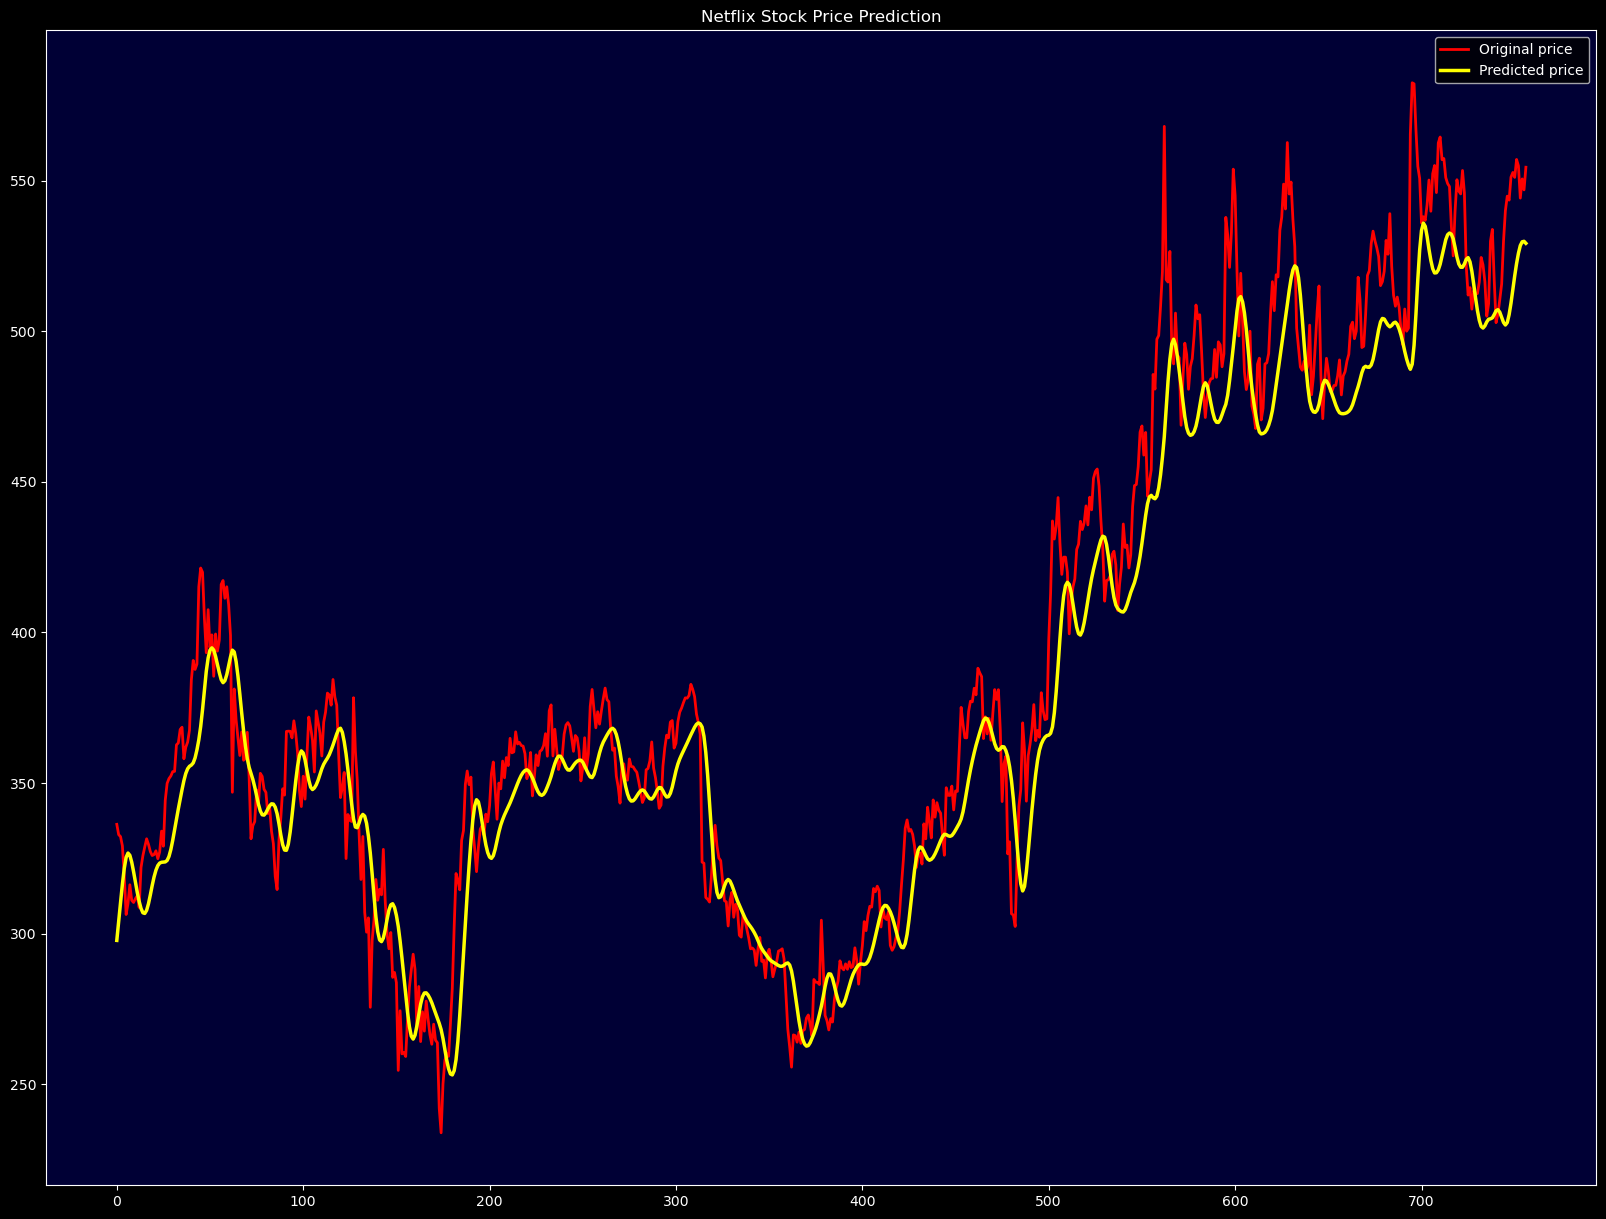

In [23]:
plt.style.use('dark_background')
fig,ax=plt.subplots(figsize=(20,15))
ax.set_facecolor('#000035')
ax.plot(y_test_scaled,color='red',linewidth=2,label='Original price')
plt.plot(predictions,color='yellow',linewidth=2.5,label='Predicted price')
plt.title('Netflix Stock Price Prediction')
plt.legend();